# Online Shoppers Intention

## 1. Problem Statement
The aim of this project is to predict study the consumer's behaviour
about the possibility to

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.core.display import display
from matplotlib.pyplot import cm
import seaborn as sns


In [75]:
path = r'C:/Users/andre/OneDrive/Documenti/GitHub/Online Shoppers Intention/online_shoppers_intention.csv'
df = pd.read_csv(path)#.sort_values(["ICUSTAY_ID","offset"])

## 2. Dataset
The dataset includes feature vectors from 12,330 sessions.

The dataset was created so that each session would be associated with a different user throughout the course of a year in order to prevent any inclination to a particular campaign, noteworthy day, user profile, or time frame.

The dataset is made by **10 numerical features** and **8 categorical features**.

**Attributes Information**

* **Administrative**: This is the number of pages of this type (administrative) that the user visited.
* **Administrative Duration**: This is the amount of time spent in this category of pages.

* **Informational**: This is the number of pages of this type (informational) that the user visited.
* **Informational Duration**: This is the amount of time spent in this category of pages.
* **Product Related**: This is the number of pages of this type (product related) that the user visited.
* **Product Related Duration** : This is the amount of time spent in this category of pages.

* **Bounce Rate**: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
* **Exit Rate**: The percentage of pageviews on the website that end at that specific page.
* **Page Value**: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
* **Special Day**: indicates the closeness of the site visiting time to a specific
special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more
likely to be finalized with transaction.
* **Month**: Contains the month the pageview occurred, in string form.
* **Operating system**: An integer value representing the operating system that the user was on when viewing the page.
* **Browser**: An integer value representing the browser that the user was using to view the page.
* **Region**: An integer value representing which region the user is located in.
* **Traffic Type**: An integer value representing what type of traffic the user is categorized into.
* **Visitor Type**: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
* **Weekend**: A boolean representing whether the session is on a weekend.
* **Revenue**: A boolean representing whether or not the user completed the purchase.

### Categorical Features

In [76]:
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region',
                        'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

descriptions = ['string indicating month the pageview occurred.',
                'integer value that represents the user’s operating system at the time the page was viewed.',
                'integer value that represents the user’s browser at the time the page was viewed.',
                'region of the user is indicated by an integer value.',
                'category of traffic the user falls under is represented by an integer value.',
                'string indicating whether a visitor is a New Visitor, a Returning Visitor, or Other',
                'boolean value indicating whether or not the session is on a weekend',
                'class label, boolean indicating whether or not the user completed the purchase.']

nans = [df.Month.isna().sum(),
                  df.OperatingSystems.isna().sum(),
                  df.Browser.isna().sum(),
                  df.Region.isna().sum(),
                  df.TrafficType.isna().sum(),
                  df.VisitorType.isna().sum(),
                  df.Weekend.isna().sum(),
                  df.Revenue.isna().sum()]

distinct_values =[df.Month.unique(),
                  df.OperatingSystems.unique(),
                  df.Browser.unique(),
                  df.Region.unique(),
                  df.TrafficType.unique(),
                  df.VisitorType.unique(),
                  df.Weekend.unique(),
                  df.Revenue.unique()]

count_values =  [df.Month.nunique(),
                 df.OperatingSystems.nunique(),
                 df.Browser.nunique(),
                 df.Region.nunique(),
                 df.TrafficType.nunique(),
                 df.VisitorType.nunique(),
                 df.Weekend.nunique(),
                 df.Revenue.nunique()]

df_categorical_features_description = pd.DataFrame()

df_categorical_features_description['Feature Name'] = categorical_features
df_categorical_features_description['Description'] = descriptions
df_categorical_features_description['NaNs'] = nans
df_categorical_features_description['Distinct Values'] = distinct_values
df_categorical_features_description['Distinct Count'] = count_values

df_categorical_features_description = df_categorical_features_description.sort_values('Feature Name')

del descriptions, distinct_values, count_values
df_categorical_features_description.style.set_properties(**{'text-align': 'left'})
display(df_categorical_features_description.style.hide_index())

Feature Name,Description,NaNs,Distinct Values,Distinct Count
Browser,integer value that represents the user’s browser at the time the page was viewed.,0,[ 1 2 3 4 5 6 7 10 8 9 12 13 11],13
Month,string indicating month the pageview occurred.,0,['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'],10
OperatingSystems,integer value that represents the user’s operating system at the time the page was viewed.,0,[1 2 4 3 7 6 8 5],8
Region,region of the user is indicated by an integer value.,0,[1 9 2 3 4 5 6 7 8],9
Revenue,"class label, boolean indicating whether or not the user completed the purchase.",0,[False True],2
TrafficType,category of traffic the user falls under is represented by an integer value.,0,[ 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 18 19 16 17 20],20
VisitorType,"string indicating whether a visitor is a New Visitor, a Returning Visitor, or Other",0,['Returning_Visitor' 'New_Visitor' 'Other'],3
Weekend,boolean value indicating whether or not the session is on a weekend,0,[False True],2


### Numerical Features

In [77]:
numerical_features = list(set(df.columns)-set(categorical_features))

descriptions = ['average page value over the value of the target page and/or the successful completion of an online purchase',
                'how many product related pages the user accessed',
                '#seconds spent on product related pages.',
                '#seconds spent on administrative pages',
                'how many pages of informational type the user accessed',
                'percentage of website pageviews actually end on that particular page',
                'proportion of users that arrive on that page of the website and leave without performing any further actions',
                'how many pages of administrative type the user accessed.',
                'closeness of the site visiting time to a special day',
                '#seconds spent on informational pages.']
nans = [df.PageValues.isna().sum(),
                  df.ProductRelated.isna().sum(),
                  df.ProductRelated_Duration.isna().sum(),
                  df.Administrative_Duration.isna().sum(),
                  df.Informational.isna().sum(),
                  df.ExitRates.isna().sum(),
                  df.BounceRates.isna().sum(),
                  df.Administrative.isna().sum(),
                  df.SpecialDay.isna().sum(),
                  df.Informational_Duration.isna().sum()]

mins =[df.PageValues.min(),
                  df.ProductRelated.min(),
                  df.ProductRelated_Duration.min(),
                  df.Administrative_Duration.min(),
                  df.Informational.min(),
                  df.ExitRates.min(),
                  df.BounceRates.min(),
                  df.Administrative.min(),
                  df.SpecialDay.min(),
                  df.Informational_Duration.min()]

maxs =[df.PageValues.max(),
                  df.ProductRelated.max(),
                  df.ProductRelated_Duration.max(),
                  df.Administrative_Duration.max(),
                  df.Informational.max(),
                  df.ExitRates.max(),
                  df.BounceRates.max(),
                  df.Administrative.max(),
                  df.SpecialDay.max(),
                  df.Informational_Duration.max()]

means =[df.PageValues.mean(),
                  df.ProductRelated.mean(),
                  df.ProductRelated_Duration.mean(),
                  df.Administrative_Duration.mean(),
                  df.Informational.mean(),
                  df.ExitRates.mean(),
                  df.BounceRates.mean(),
                  df.Administrative.mean(),
                  df.SpecialDay.mean(),
                  df.Informational_Duration.mean()]

stds =[df.PageValues.std(),
                  df.ProductRelated.std(),
                  df.ProductRelated_Duration.std(),
                  df.Administrative_Duration.std(),
                  df.Informational.std(),
                  df.ExitRates.std(),
                  df.BounceRates.std(),
                  df.Administrative.std(),
                  df.SpecialDay.std(),
                  df.Informational_Duration.std()]

count_values =  [df.PageValues.nunique(),
                  df.ProductRelated.nunique(),
                  df.ProductRelated_Duration.nunique(),
                  df.Administrative_Duration.nunique(),
                  df.Informational.nunique(),
                  df.ExitRates.nunique(),
                  df.BounceRates.nunique(),
                  df.Administrative.nunique(),
                  df.SpecialDay.nunique(),
                  df.Informational_Duration.nunique()]

df_numerical_features_description = pd.DataFrame()

df_numerical_features_description['Feature Name'] = numerical_features
df_numerical_features_description['Description'] = descriptions
df_numerical_features_description['NaNs'] = nans
df_numerical_features_description['Min'] = mins
df_numerical_features_description['Max'] = maxs
df_numerical_features_description['Mean'] = means
df_numerical_features_description['Std'] = stds
df_numerical_features_description['Distinct Count'] = count_values

df_numerical_features_description=df_numerical_features_description.sort_values('Feature Name')
df_numerical_features_description.style.set_properties(**{'text-align': 'left'})
display(df_numerical_features_description.style.hide_index())
#print(df_numerical_features_description.to_string(index=False))

Feature Name,Description,NaNs,Min,Max,Mean,Std,Distinct Count
Administrative,#seconds spent on informational pages.,0,0.000000,2549.375000,34.472398,140.749294,1258
Administrative_Duration,proportion of users that arrive on that page of the website and leave without performing any further actions,0,0.000000,0.200000,0.022191,0.048488,1872
BounceRates,percentage of website pageviews actually end on that particular page,0,0.000000,0.200000,0.043073,0.048597,4777
ExitRates,how many pages of administrative type the user accessed.,0,0.000000,27.000000,2.315166,3.321784,27
Informational,average page value over the value of the target page and/or the successful completion of an online purchase,0,0.000000,361.763742,5.889258,18.568437,2704
Informational_Duration,how many pages of informational type the user accessed,0,0.000000,24.000000,0.503569,1.270156,17
PageValues,#seconds spent on product related pages.,0,0.000000,63973.522230,1194.746220,1913.669288,9551
ProductRelated,closeness of the site visiting time to a special day,0,0.000000,1.000000,0.061427,0.198917,6
ProductRelated_Duration,#seconds spent on administrative pages,0,0.000000,3398.750000,80.818611,176.779107,3335
SpecialDay,how many product related pages the user accessed,0,0.000000,705.000000,31.731468,44.475503,311


## 3. Data Exploration

Let's see what are the distinct values assumed by each feature
df.Administrative.hist()

In [78]:
print("First 5 rows of the dataset")
df[50:55]

First 5 rows of the dataset


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
50,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,3,4,Returning_Visitor,True,False
51,0,0.0,0,0.0,12,265.166667,0.011111,0.026111,0.0,0.2,Feb,3,2,1,3,Returning_Visitor,False,False
52,0,0.0,0,0.0,2,29.000000,0.000000,0.100000,0.0,1.0,Feb,2,4,4,2,Returning_Visitor,True,False
53,0,0.0,0,0.0,4,160.000000,0.000000,0.075000,0.0,0.0,Feb,4,2,2,3,Returning_Visitor,False,False
54,0,0.0,0,0.0,4,135.666667,0.050000,0.025000,0.0,0.4,Feb,3,3,1,4,Returning_Visitor,False,False


In [79]:
print("Dataset information")
df.info()
print("")

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Tr

### Countplots Categorical Features

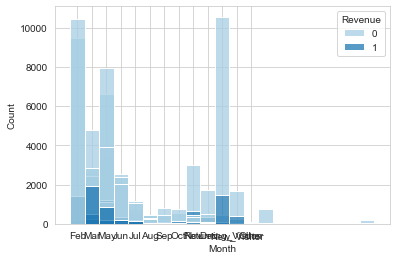

In [80]:
#We need to perform different data exploration analysis depending on the data
#type, indeed histograms are more suggested for categorical features and
# boxplots for numeric features for example
import datetime
import time
df.Weekend = df.Weekend.astype(int)
df.Revenue = df.Revenue.astype(int)
df['Month'].replace('June', 'Jun', inplace=True)
df.Month = sorted(df.Month, key=lambda x: pd.to_datetime(x, format="%b"))

path_save_plots = r'C:\Users\andre\OneDrive\Documenti\DATA SCIENCE ENGINEERING\I ANNO\MATHEMATICS IN MACHINE LEARNING\Project\images\3. Data Exploration\Categorical'

colors = iter(cm.rainbow(np.linspace(0, 2, len(categorical_features))))
sns.color_palette("Paired")
for feature, color in zip(categorical_features, colors):
    #plt.figure()
    n_bins = df[feature].nunique()
    sns.histplot(df, x = feature, hue='Revenue', color = color, multiple='stack', bins=n_bins,discrete=True, palette='Paired')
    #plt.xticks(range(0,n_bins))
    #plt.title(feature)
    plt.savefig(path_save_plots + f"\{feature}_Revenue.png")

### BoxPlots Numerical Features

In [81]:
numerical_df = df.drop(categorical_features[:-1], axis=1) #numerical df contiene tutte le numerical features più revenue
# numerical_features = numerical_df.columns
# numerical_features = pd.Series(list(set(df.columns)-set(categorical_features)))
# numerical_features = set((df.columns)-(categorical_df.columns))
#sns.boxplot(x = 'Revenue', y = 'Informational', data = df,palette='Paired')

colors = iter(cm.rainbow(np.linspace(0, 2, len(categorical_features))))
path_save_plots_numerical = r'C:\Users\andre\OneDrive\Documenti\DATA SCIENCE ENGINEERING\I ANNO\MATHEMATICS IN MACHINE LEARNING\Project\images\3. Data Exploration\Numerical'



sns.set_style("whitegrid")
for feature in numerical_features: #-1 perchè così feature non assume 'Revenue'
    #plt.figure()
    #sns.boxplot(x= 'Revenue', y = feature, hue='Revenue', data = df,palette='Paired')
    #plt.title(feature)
    #plt.legend(title='Revenue')
    #plt.show()
    plt.savefig(path_save_plots_numerical+f"\{feature}_Revenue.png")

<Figure size 432x288 with 0 Axes>

In [82]:
for feature in numerical_features:
    print(df[feature].value_counts())
    #sns.displot(df, x=feature, kind="kde", bw_adjust=2)
    #plt.title(feature+" distribution")

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
24       1
16       1
Name: Informational, dtype: int64
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64
0.000000     9600
53.988000       6
42.293068       3
40.278152       2
12.558857       2
             ... 
1.625051        1
20.157102       1
8.191923        1
12.587222       1
30.203577       1
Name: PageValues, Length: 2704, dtype: int64
0.000000       755
17.000000       21
8.000000        17
11.000000       17
15.000000       16
              ... 
6560.007540      1
821.893333       1
2004.500000      1
266.500000       1
1919.550000      1
Name: ProductRelated_Duration, Length: 9551, dtype: int64
0.0      9925
9.0        33
6.0        26
10.0       26
7.0        26
         ... 
291.5       1
43.2        1
338.4       1
86.6        1
145.6       1
Name: 

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


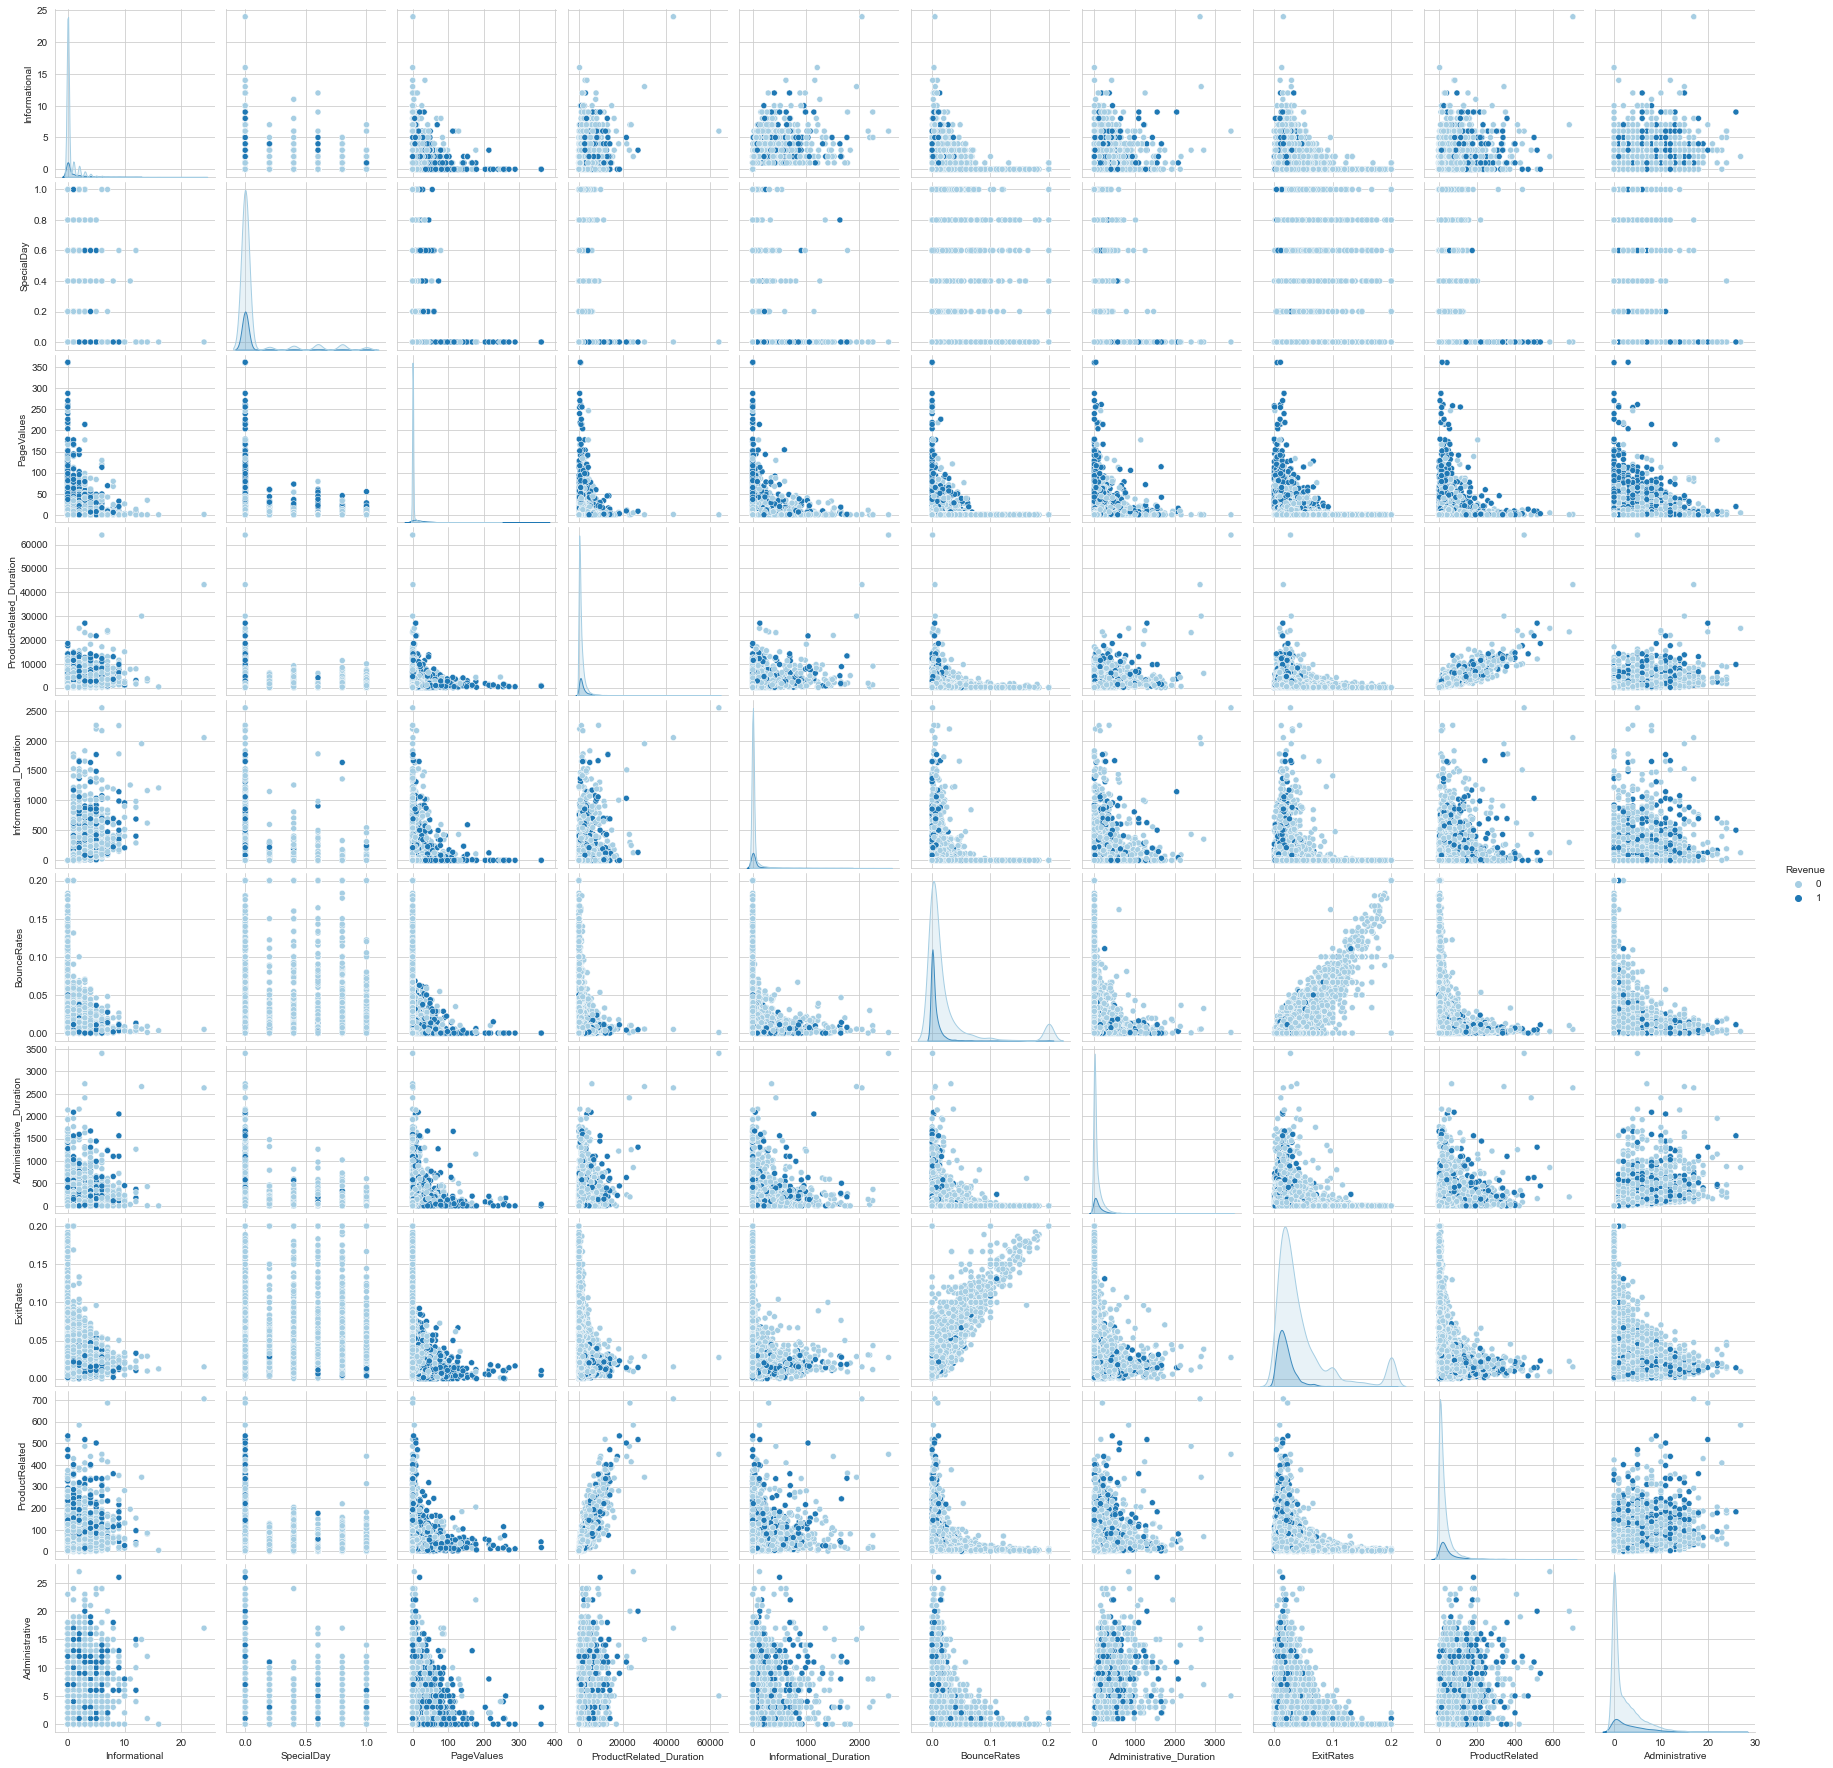

In [83]:
numerical_features = list(set(df.columns)-set(categorical_features))
numerical_features.append('Revenue')
df_numerical = df[numerical_features]
df_numerical.Revenue = df_numerical.Revenue.astype(int)
sns.pairplot(df_numerical, hue='Revenue', palette = 'Paired')

In [84]:
numerical_features

['Informational',
 'SpecialDay',
 'PageValues',
 'ProductRelated_Duration',
 'Informational_Duration',
 'BounceRates',
 'Administrative_Duration',
 'ExitRates',
 'ProductRelated',
 'Administrative',
 'Revenue']

Text(0.5, 1.0, 'Correlation between ExitRates and BounceRates')

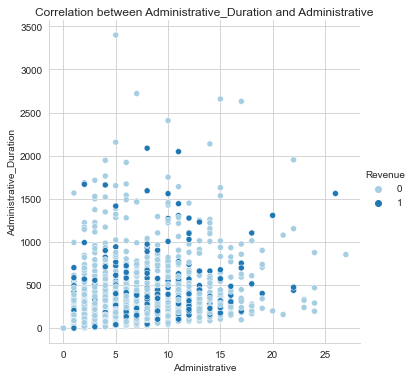

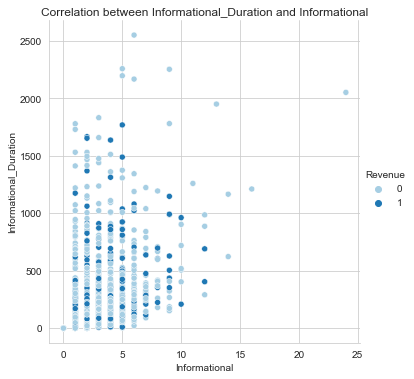

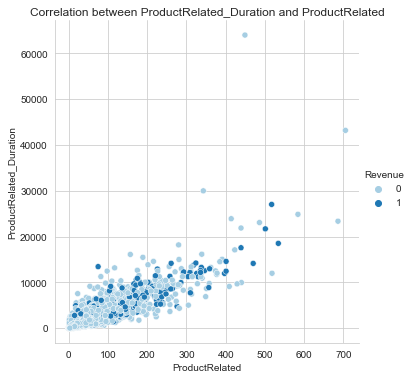

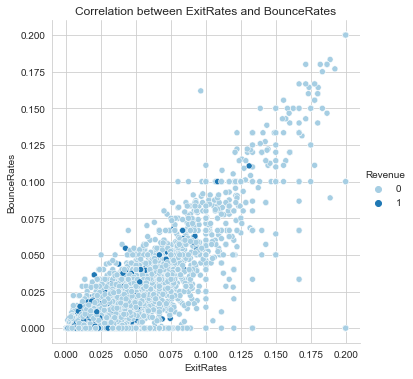

In [85]:
sns.relplot(x = 'Administrative', y = 'Administrative_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between Administrative_Duration and Administrative")

sns.relplot(x = 'Informational', y = 'Informational_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between Informational_Duration and Informational")

sns.relplot(x = 'ProductRelated', y = 'ProductRelated_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between ProductRelated_Duration and ProductRelated")

sns.relplot(x = 'ExitRates', y = 'BounceRates', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between ExitRates and BounceRates")

### Correlation Matrix

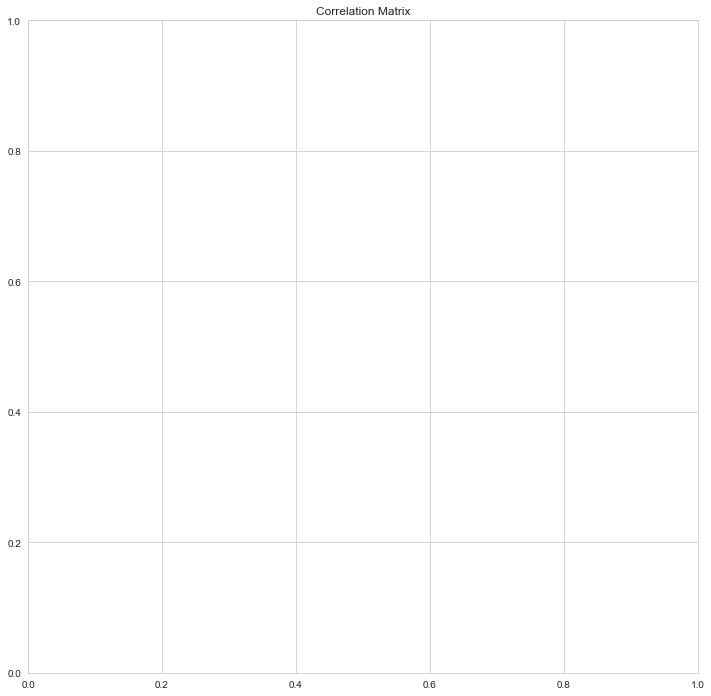

In [86]:
matrix = numerical_df.corr()
fig, ax = plt.subplots(figsize=(12,12))
#sns.heatmap(matrix, annot=True, ax=ax, vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu')
plt.title("Correlation Matrix")
plt.savefig(path_save_plots_numerical+"\correlation_matrix.png")
#plt.show()

Text(0.5, 1.0, 'Correlation between BounceRates and ExitRates')

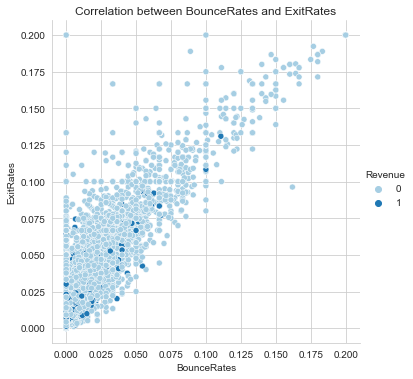

In [88]:
sns.relplot(x = 'BounceRates', y = 'ExitRates', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between BounceRates and ExitRates")


## 4. Data Cleaning

In [89]:
df3=df.copy()
df['Weekend'] = df['Weekend'].astype('int64')
df['Revenue'] = df['Revenue'].astype('int64')

In [ ]:
df = df.drop(columns=['BounceRates','Administrative_Duration', 'Informational_Duration','ProductRelated_Duration'], axis = 1)
# One hot encoding
dummy_columns = ['OperatingSystems','Browser','Region','TrafficType','VisitorType', 'Weekend']

for column in dummy_columns:
    df_dummies = pd.get_dummies(df[column], drop_first = True, prefix = column)
    df = pd.concat([df, df_dummies], axis = 1)

df = df.drop(columns = dummy_columns)

# Accounting for all months in the calendar except Jan and Apr not present
months = ['Feb','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for mx in months[1:]:    # drop_first = True
    df3['Month_'+mx] = (df['Month'] == mx).astype('int64')

df = df.drop(columns = ['Month'])

In [32]:
#Convert categorical features with one-hot encoding
original_df = df.copy()
df2 = original_df.copy()
for column in categorical_features[:-1]: #-1: neglect Revenue

    #Create for each value of categorical feature a distinct column
    #ex. Month = [Feb, Mar, ..., Dec] will be Month=Feb, Month=Mar, ..., Month = Dec

    df_onehot = pd.get_dummies(df2[column], drop_first=True, prefix=column+'_', prefix_sep= '_')

    #Cocat together the one_hot df just created with original one
    df2 = pd.concat([df2, df_onehot], axis = 1)

    #Remove features that are no no longer needed
    #ex. since we now have Month=Feb, Month = Mar, ..., Month = Dec we can drop Month column
    df2 = df2.drop(column, axis = 1)


#Remove highly correlated features to reduce the #dimensions
#Handle missing data
#Handle outliers
